# Переменные для инициализации

In [5]:
from random import uniform
import math

All_Lost = 0
BasicOptOfferPrice = 35
BasicOptOfferVol = 50
BasicStore = 80
InitAccount = 10000
InitTaxes = 0
Max_Demand = 30
MeanDPrice = 100
OptOfferAcceptDecision = 1 # Bool
OptOfferBaseVolume = 40
RentRate = 200
Ret_Price = 100  # Розничная цена
ShopStore = 30
STOP_SELL = 0 # Bool
TaxesRate = 30
TransferDecision = 1 # Bool
TransferRate = 150
TransferVol = 30 # Объем перевозки
dt = 1
TIME = 0

# Расчет начальных значений уровней и потоков

In [6]:
timer = 100

Account = InitAccount
Taxes = InitTaxes

BasicPriceRnd = BasicOptOfferVol * (uniform(.7, 1.3))
AddPriceByTime = BasicOptOfferPrice * 0.03 * TIME + BasicOptOfferPrice * 0.01 * TIME * uniform(0, 1)
OfferOnePrice = AddPriceByTime + BasicPriceRnd
RndOfferVolume = round(OptOfferBaseVolume * uniform(0.75, 1.25))
OfferFullPrice = OfferOnePrice * RndOfferVolume
OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
GoodsTransfer = math.floor(TransferActualVolue)
Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

Demand = round(Max_Demand * (1 - 1 / (1 + math.exp(-0.05 * (Ret_Price - MeanDPrice)))))
RND_Demand = round(Demand * uniform(0.7, 1.2))
SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
Selling = SoldRet
Income = Ret_Price * SoldRet
TaxesCalc = Income * TaxesRate / 100
TaxesPayment = Taxes if TIME % 30 == 0 else 0
DailySpending = min(RentRate, Account)
TransSpend = TransferRate if TransferActualVolue > 0 else 0
VAT = TaxesPayment

print("-----------INITIAL DATA-----------")
print("-----------LEVEL VALUES-----------")
print(f"Account = {Account}")
print(f"BasicStore = {BasicStore}")
print(f"ShopStore = {ShopStore}")
print("---------CHANGEABLE VALUES--------")
print(f"TransferVolume = {TransferVol}")
print(f"Ret_Price = {Ret_Price}")
print(f"STOP_SELL = {bool(STOP_SELL)}")
print(f"OptOfferAcceptDecision = {bool(OptOfferAcceptDecision)}")
print(f"TransferDecision = {bool(TransferDecision)}")
print("---------AUXILIARY VALUES---------")
print(f"RndOfferVolume = {RndOfferVolume}")
print(f"OfferFullPrice = {OfferFullPrice}")
print(f"OfferOnePrice = {OfferOnePrice}")
print(f"RND_Demand = {RND_Demand}")
print()

permanent_change_params = True if input("Do u want to change parameters during modeling? Y/N").lower() == 'y' else False

-----------INITIAL DATA-----------
-----------LEVEL VALUES-----------
Account = 10000
BasicStore = 80
ShopStore = 30
---------CHANGEABLE VALUES--------
TransferVolume = 30
Ret_Price = 100
STOP_SELL = False
OptOfferAcceptDecision = True
TransferDecision = True
---------AUXILIARY VALUES---------
RndOfferVolume = 37
OfferFullPrice = 1613.4894391129212
OfferOnePrice = 43.6078226787276
RND_Demand = 15


# Моделирование

In [7]:
account_data = [Account]
taxes_data = [Taxes]
shop_store_data = [ShopStore]
basic_store_data = [BasicStore]

for TIME in range(1, timer + 1):
    if permanent_change_params:
        change_params = True if input("Do u want to change parameters during modeling? Y/N").lower() == 'y' else False
        if change_params:
            TransferVol = float(input(f"Write TransferVolume"))
            Ret_Price = float(input(f"Write Ret_Price"))
            STOP_SELL = 1 if input(f"Write STOP_SELL (y/n)").lower() == 'y' else 0
            OptOfferAcceptDecision = 1 if input(f"Write OptOfferAcceptDecision (y/n)").lower() == 'y' else 0
            TransferDecision = 1 if input(f"Write TransferDecision (y/n)").lower() == 'y' else 0
    Account += dt * (Income - DailySpending - TransSpend - VAT)
    BasicStore += dt * (SmallOptIncom - GoodsTransfer)
    ShopStore += dt * (GoodsTransfer - Selling - Lost)
    Taxes += dt * (TaxesCalc - TaxesPayment)
    All_Lost += dt * Lost

    BasicPriceRnd = BasicOptOfferVol * (uniform(.7, 1.3))
    AddPriceByTime = BasicOptOfferPrice * 0.03 * TIME + BasicOptOfferPrice * 0.01 * TIME * uniform(0, 1)
    OfferOnePrice = AddPriceByTime + BasicPriceRnd
    RndOfferVolume = round(OptOfferBaseVolume * uniform(0.75, 1.25))
    OfferFullPrice = OfferOnePrice * RndOfferVolume
    OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
    SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

    TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
    GoodsTransfer = math.floor(TransferActualVolue)
    Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

    Demand = round(Max_Demand * (1 - 1 / (1 + math.exp(-0.05 * (Ret_Price - MeanDPrice)))))
    RND_Demand = round(Demand * uniform(0.7, 1.2))
    SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
    Selling = SoldRet
    Income = Ret_Price * SoldRet
    TaxesCalc = (Income-DailySpending-TransSpend)*TaxesRate/100
    TaxesPayment = Taxes if TIME % 30 == 0 else 0
    DailySpending = min(RentRate, Account)
    TransSpend = TransferRate if TransferActualVolue > 0 else 0
    VAT = TaxesPayment
    account_data.append(Account)
    taxes_data.append(Taxes)
    shop_store_data.append(ShopStore)
    basic_store_data.append(BasicStore)
    print(f"-------DATA ON STEP {TIME}-------")
    print("-----------LEVEL VALUES-----------")
    print(f"Account = {Account}")
    print(f"BasicStore = {BasicStore}")
    print(f"ShopStore = {ShopStore}")
    print("---------CHANGEABLE VALUES--------")
    print(f"TransferVolume = {TransferVol}")
    print(f"Ret_Price = {Ret_Price}")
    print(f"STOP_SELL = {bool(STOP_SELL)}")
    print(f"OptOfferAcceptDecision = {bool(OptOfferAcceptDecision)}")
    print(f"TransferDecision = {bool(TransferDecision)}")
    print("---------AUXILIARY VALUES---------")
    print(f"RndOfferVolume = {RndOfferVolume}")
    print(f"OfferFullPrice = {OfferFullPrice}")
    print(f"OfferOnePrice = {OfferOnePrice}")
    print(f"RND_Demand = {RND_Demand}")
    print()

-------DATA ON STEP 1-------
-----------LEVEL VALUES-----------
Account = 11150
BasicStore = 87
ShopStore = 45
---------CHANGEABLE VALUES--------
TransferVolume = 30
Ret_Price = 100
STOP_SELL = False
OptOfferAcceptDecision = True
TransferDecision = True
---------AUXILIARY VALUES---------
RndOfferVolume = 45
OfferFullPrice = 2463.0121070876985
OfferOnePrice = 54.733602379726634
RND_Demand = 12

-------DATA ON STEP 2-------
-----------LEVEL VALUES-----------
Account = 12000
BasicStore = 102
ShopStore = 63
---------CHANGEABLE VALUES--------
TransferVolume = 30
Ret_Price = 100
STOP_SELL = False
OptOfferAcceptDecision = True
TransferDecision = True
---------AUXILIARY VALUES---------
RndOfferVolume = 38
OfferFullPrice = 2072.2193176832566
OfferOnePrice = 54.53208730745412
RND_Demand = 15

-------DATA ON STEP 3-------
-----------LEVEL VALUES-----------
Account = 13150
BasicStore = 110
ShopStore = 78
---------CHANGEABLE VALUES--------
TransferVolume = 30
Ret_Price = 100
STOP_SELL = False
OptOf

# Визуализация

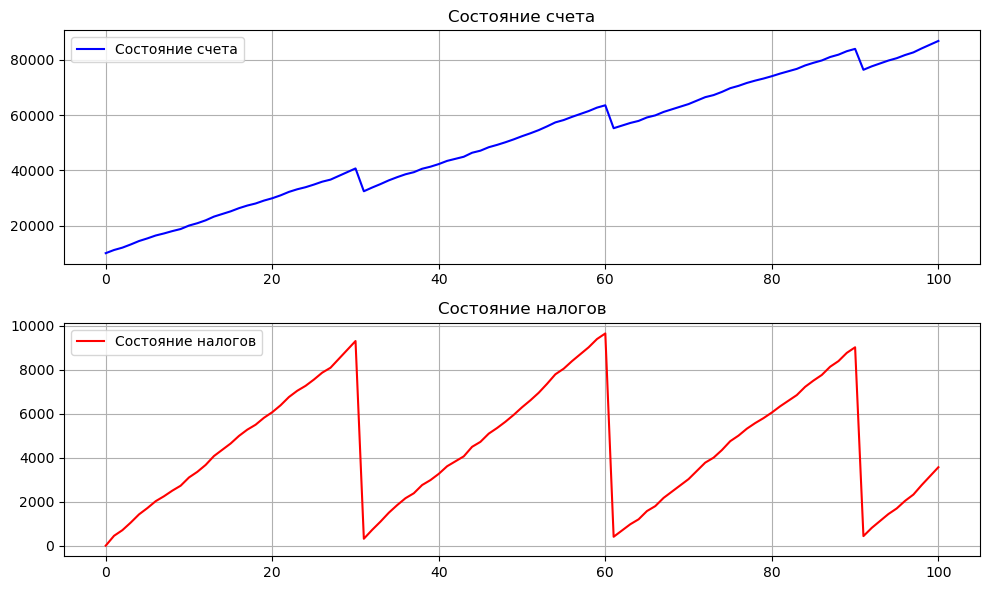

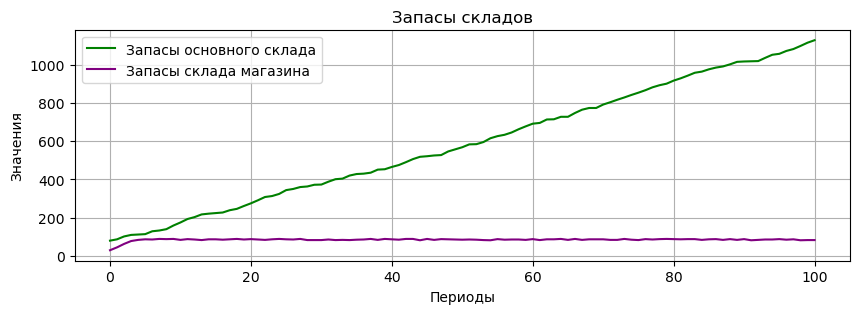

In [12]:
import matplotlib.pyplot as plt

# Создание первого графика для состояния счета и состояния налогов
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(account_data, label='Состояние счета', color='blue')
plt.title('Состояние счета')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(taxes_data, label='Состояние налогов', color='red')
plt.title('Состояние налогов')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Создание второго графика для запасов склада и магазина
plt.figure(figsize=(10, 3))

plt.plot(basic_store_data, label='Запасы основного склада', color='green')
plt.plot(shop_store_data, label='Запасы склада магазина', color='purple')

plt.title('Запасы складов')
plt.xlabel('Периоды')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)

plt.show()
